In [1]:
# Setup
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

sys.path.insert(0, '..')
plt.rcParams['figure.figsize'] = [10, 8]

from graph import Graph
from walkers import RandomWalker, GreedyUnbiasedWalker, DegreeBiasedWalker
from simulator import Simulator

Conjecture for performance of expected degree distribution: The closer the score is to expected degree, the better the performance.


Let $d_i$ be the degree distubution, $p_i$ be its corresponding probabilty distribution, $n$ be the number of degrees, and $d_{exp}$ be the expected degree.

Performance score: $\LARGE \sum (\frac{d_i^2p_i}{d_{exp}})$ with tiebreaker: higher $(d_{max}-d_{min})$ is better, if tie again higher $d_{min}$ is better.


In [2]:
def score(d_dist, exp_d):
    score = 0
    for key in d_dist:
        score += key*(key*d_dist[key]/exp_d)
    dmax = max(d_dist.keys())
    dmin = min(d_dist.keys())
    d_diff = dmax-dmin
    return round(score, 5), d_diff, dmax, dmin

In [3]:
def intersection(dist1, dist2, n, d, steps, walker_class, k):
    summary = []
    count = 0
    sign = 0
    ed1 = Simulator.simulate_w_on_ed_visited_prop(n, dist1, steps, walker_class, None, True, k)
    ed2 = Simulator.simulate_w_on_ed_visited_prop(n, dist2, steps, walker_class, None, True, k)
    diff = np.round(ed1-ed2, 2)
    for i in range(steps):
        if diff[i] < 0 and sign == 0:
            count += 1
            sign = 1
            summary.append([count, i+1, ed1[i], ed2[i], diff[i]])
        elif diff[i] > 0 and sign == 1:
            count += 1
            sign = 0
            summary.append([count, i+1, ed1[i], ed2[i], diff[i]])
    return summary, count

In [4]:
def intersectionSummary(dists, n, d, steps, walker_class, k):
    pairs = list(itertools.combinations(dists, 2))
    for i in range(len(pairs)):
        labels = ['intersection count', 'step', str(pairs[i][0])+' visited prop.', str(pairs[i][1])+' visited prop.', 'diff']
        df = pd.DataFrame(intersection(pairs[i][0], pairs[i][1], n, d, steps, walker_class, k)[0], columns=labels, dtype = object)
        display(df)

## Expected Degree: 3, 4, 5, 7

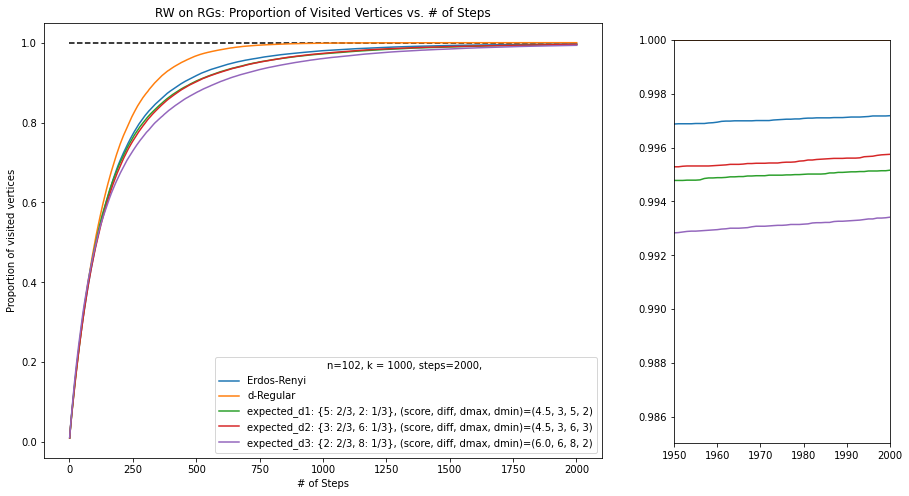

In [6]:
# Expected Degree: 4
n, d, steps, walker_class, k = 102, 4, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {5: 2/3, 2: 1/3}, {3: 2/3, 6: 1/3}, {2: 2/3, 8: 1/3}
dp = [d_p1, d_p2, d_p3]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{5: 2/3, 2: 1/3}', '{3: 2/3, 6: 1/3}', '{2: 2/3, 8: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(1950, 2000)
plt.ylim(0.985, 1)

plt.show()

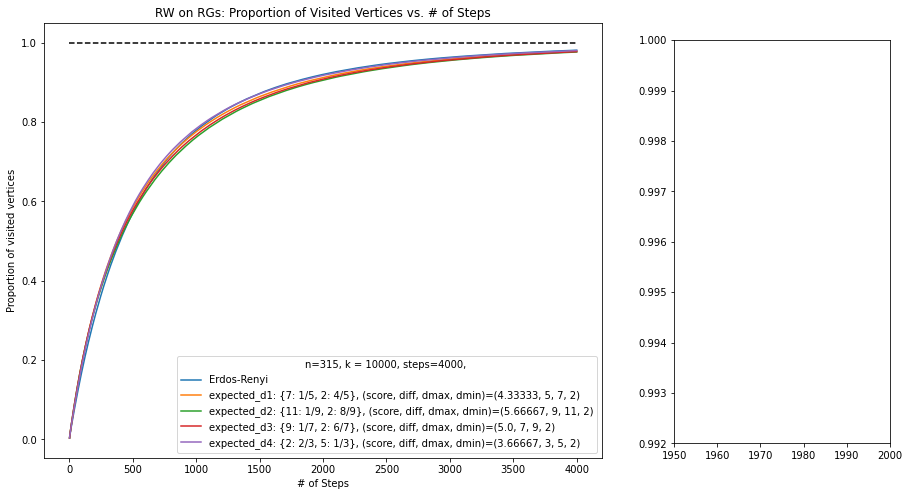

In [22]:
# Expected degree: 3
# increased sample to 10000 for stability
n, d, steps, walker_class, k = 315, 3, 4000, RandomWalker, 10000
d_p1, d_p2, d_p3, d_p4 = {7: 1/5, 2: 4/5}, {11: 1/9, 2: 8/9}, {9: 1/7, 2: 6/7}, {2: 2/3, 5: 1/3}
dp = [d_p1, d_p2, d_p3, d_p4]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
# k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
# plt.plot(t, k_reg, label='d-Regular')
l = ['{7: 1/5, 2: 4/5}', '{11: 1/9, 2: 8/9}', '{9: 1/7, 2: 6/7}', '{2: 2/3, 5: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
# plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
# plt.xlim(1950, 2000)
plt.ylim(0.992, 1)

plt.show()

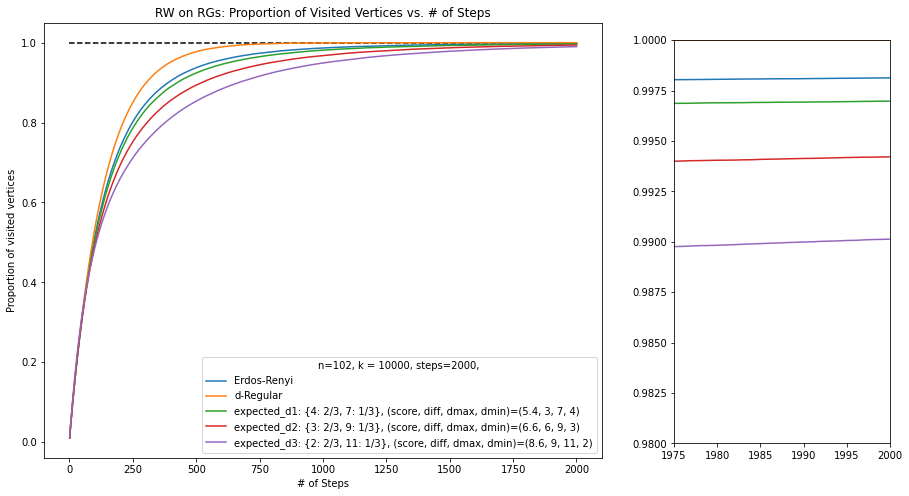

In [8]:
n, d, steps, walker_class, k = 102, 5, 2000, RandomWalker, 10000
d_p1, d_p2, d_p3 = {4: 2/3, 7: 1/3}, {3: 2/3, 9: 1/3}, {2: 2/3, 11: 1/3}
dp = [d_p1, d_p2, d_p3]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{4: 2/3, 7: 1/3}', '{3: 2/3, 9: 1/3}', '{2: 2/3, 11: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(1975, 2000)
plt.ylim(0.98, 1)

plt.show()

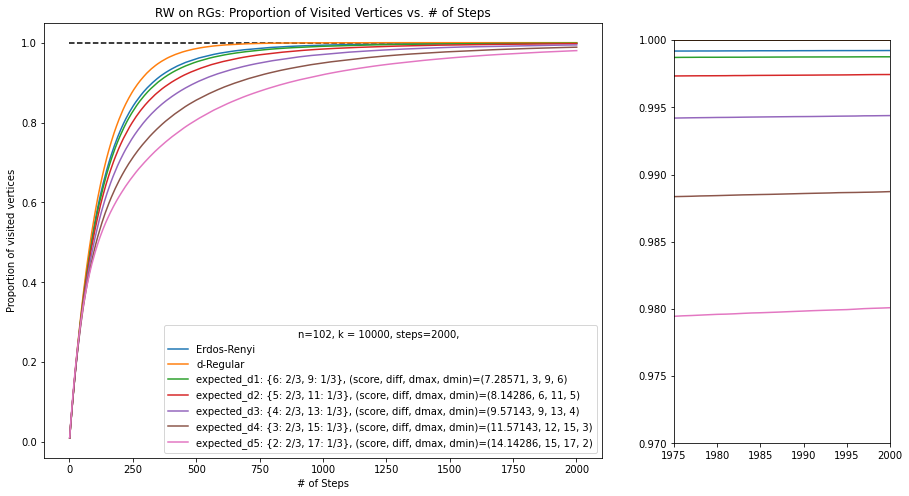

In [9]:
n, d, steps, walker_class, k = 102, 7, 2000, RandomWalker, 10000
d_p1, d_p2, d_p3, d_p4, d_p5 = {6: 2/3, 9: 1/3}, {5: 2/3, 11: 1/3}, {4: 2/3, 13: 1/3}, {3: 2/3, 15: 1/3}, {2: 2/3, 17: 1/3}
dp = [d_p1, d_p2, d_p3, d_p4, d_p5]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{6: 2/3, 9: 1/3}', '{5: 2/3, 11: 1/3}', '{4: 2/3, 13: 1/3}', '{3: 2/3, 15: 1/3}', '{2: 2/3, 17: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(1975, 2000)
plt.ylim(0.97, 1)

plt.show()

Performance score: $\LARGE \sum (\frac{d_i^2p_i}{d_{exp}})$ with tiebreaker: higher $(d_{max}-d_{min})$ is better, if tie again higher $d_{min}$ is better. Predicts order before intersection at around 80%.

# 4/22

In [10]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 10000

### Expected degree = 3:
1. {7: 1/5, 2: 4/5}, {11: 1/9, 2: 8/9}, {9: 1/7, 2: 6/7}, {2: 2/3, 5: 1/3}

    #### Intersections:

In [23]:
n_3 = 315
k_3 = 4000
dists = [{7: 1/5, 2: 4/5}, {11: 1/9, 2: 8/9}, {9: 1/7, 2: 6/7}, {2: 2/3, 5: 1/3}]
intersectionSummary(dists, n_3, d, steps, walker_class, k)

,intersection count,step,"{7: 0.2, 2: 0.8} visited prop.","{11: 0.1111111111111111, 2: 0.8888888888888888} visited prop.",diff


,intersection count,step,"{7: 0.2, 2: 0.8} visited prop.","{9: 0.14285714285714285, 2: 0.8571428571428571} visited prop.",diff


,intersection count,step,"{7: 0.2, 2: 0.8} visited prop.","{2: 0.6666666666666666, 5: 0.3333333333333333} visited prop.",diff
0,1,542,0.608148,0.613167,-0.01


,intersection count,step,"{11: 0.1111111111111111, 2: 0.8888888888888888} visited prop.","{9: 0.14285714285714285, 2: 0.8571428571428571} visited prop.",diff
0,1,308,0.43564,0.440652,-0.01


,intersection count,step,"{11: 0.1111111111111111, 2: 0.8888888888888888} visited prop.","{2: 0.6666666666666666, 5: 0.3333333333333333} visited prop.",diff
0,1,265,0.396981,0.402078,-0.01


,intersection count,step,"{9: 0.14285714285714285, 2: 0.8571428571428571} visited prop.","{2: 0.6666666666666666, 5: 0.3333333333333333} visited prop.",diff
0,1,355,0.480393,0.485413,-0.01


### Expected degree = 4:
1. {5: 2/3, 2: 1/3}, {3: 2/3, 6: 1/3}, {2: 2/3, 8: 1/3}

    #### Intersections:

In [12]:
dists = [{5: 2/3, 2: 1/3}, {3: 2/3, 6: 1/3}, {2: 2/3, 8: 1/3}]
intersectionSummary(dists, n, d, steps, walker_class, k)

,intersection count,step,"{5: 0.6666666666666666, 2: 0.3333333333333333} visited prop.","{3: 0.6666666666666666, 6: 0.3333333333333333} visited prop.",diff


,intersection count,step,"{5: 0.6666666666666666, 2: 0.3333333333333333} visited prop.","{2: 0.6666666666666666, 8: 0.3333333333333333} visited prop.",diff
0,1,12,0.0908824,0.0961241,-0.01
1,2,100,0.488857,0.483585,0.01


,intersection count,step,"{3: 0.6666666666666666, 6: 0.3333333333333333} visited prop.","{2: 0.6666666666666666, 8: 0.3333333333333333} visited prop.",diff
0,1,8,0.0629037,0.0681067,-0.01
1,2,140,0.582744,0.577511,0.01


### Expected degree = 5:
1. {4: 2/3, 7: 1/3}, {3: 2/3, 9: 1/3}, {2: 2/3, 11: 1/3}

    #### Intersections:

In [13]:
dists = [{4: 2/3, 7: 1/3}, {3: 2/3, 9: 1/3}, {2: 2/3, 11: 1/3}]
intersectionSummary(dists, n, d, steps, walker_class, k)

,intersection count,step,"{4: 0.6666666666666666, 7: 0.3333333333333333} visited prop.","{3: 0.6666666666666666, 9: 0.3333333333333333} visited prop.",diff


,intersection count,step,"{4: 0.6666666666666666, 7: 0.3333333333333333} visited prop.","{2: 0.6666666666666666, 11: 0.3333333333333333} visited prop.",diff
0,1,7,0.0575833,0.0629318,-0.01
1,2,75,0.418875,0.413549,0.01


,intersection count,step,"{3: 0.6666666666666666, 9: 0.3333333333333333} visited prop.","{2: 0.6666666666666666, 11: 0.3333333333333333} visited prop.",diff
0,1,9,0.073128,0.0783729,-0.01
1,2,92,0.469734,0.464391,0.01


### Expected degree = 7:
1. {6: 2/3, 9: 1/3}, {5: 2/3, 11: 1/3}, {4: 2/3, 13: 1/3}, {3: 2/3, 15: 1/3}, {2: 2/3, 17: 1/3}

    #### Intersections:

In [14]:
dists = [{6: 2/3, 9: 1/3}, {5: 2/3, 11: 1/3}, {4: 2/3, 13: 1/3}, {3: 2/3, 15: 1/3}, {2: 2/3, 17: 1/3}]
intersectionSummary(dists, n, d, steps, walker_class, k)

,intersection count,step,"{6: 0.6666666666666666, 9: 0.3333333333333333} visited prop.","{5: 0.6666666666666666, 11: 0.3333333333333333} visited prop.",diff


,intersection count,step,"{6: 0.6666666666666666, 9: 0.3333333333333333} visited prop.","{4: 0.6666666666666666, 13: 0.3333333333333333} visited prop.",diff


,intersection count,step,"{6: 0.6666666666666666, 9: 0.3333333333333333} visited prop.","{3: 0.6666666666666666, 15: 0.3333333333333333} visited prop.",diff


,intersection count,step,"{6: 0.6666666666666666, 9: 0.3333333333333333} visited prop.","{2: 0.6666666666666666, 17: 0.3333333333333333} visited prop.",diff
0,1,7,0.0601069,0.0655139,-0.01
1,2,44,0.302388,0.296434,0.01


,intersection count,step,"{5: 0.6666666666666666, 11: 0.3333333333333333} visited prop.","{4: 0.6666666666666666, 13: 0.3333333333333333} visited prop.",diff


,intersection count,step,"{5: 0.6666666666666666, 11: 0.3333333333333333} visited prop.","{3: 0.6666666666666666, 15: 0.3333333333333333} visited prop.",diff


,intersection count,step,"{5: 0.6666666666666666, 11: 0.3333333333333333} visited prop.","{2: 0.6666666666666666, 17: 0.3333333333333333} visited prop.",diff
0,1,7,0.0599525,0.0653564,-0.01
1,2,47,0.314373,0.309172,0.01


,intersection count,step,"{4: 0.6666666666666666, 13: 0.3333333333333333} visited prop.","{3: 0.6666666666666666, 15: 0.3333333333333333} visited prop.",diff


,intersection count,step,"{4: 0.6666666666666666, 13: 0.3333333333333333} visited prop.","{2: 0.6666666666666666, 17: 0.3333333333333333} visited prop.",diff
0,1,7,0.0602735,0.0655744,-0.01
1,2,56,0.35093,0.345399,0.01


,intersection count,step,"{3: 0.6666666666666666, 15: 0.3333333333333333} visited prop.","{2: 0.6666666666666666, 17: 0.3333333333333333} visited prop.",diff
0,1,9,0.0769002,0.0820558,-0.01
1,2,77,0.419912,0.414506,0.01
